<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
# Installing PyCountry to change naming convention for mapping in final task
!pip install pycountry-convert

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-09-11 19:07:16--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  44.8MB/s    in 3.4s    

2025-09-11 19:07:20 (45.4 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



In [3]:
# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pycountry_convert as pc

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Creating SQL DB To Query Data From Directly**

In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)

65437

## MY PERSONAL STACK OF MAPPINGS TO USE THROUGHOUT FOR EASIER RENAMING

In [5]:
## This will hold all mapping data so one time run into Kernal
## And single time loading

# Mapping for SOPartFreq
mapping_partfreq = {
    'Daily or almost daily': 'Daily or Semi-Daily',
    'Multiple times per day': 'Multiple / Day',
    'A few times per week': 'Multiple / Week',
    'Less than once per month or monthly': 'Monthly',
    'A few times per month or weekly': 'Multiple / Month',
    'I have never participated in Q&A on Stack Overflow ': 'Never'
}

# Mapping of Age to String Grouping
mapping_age_text = {
    "Under 18 years old": 'Under 18',
    "18-24 years old": '18-24',
    "25-34 years old": '25-34',
    "35-44 years old": '35-44',
    "45-54 years old": '45-54',
    "55-64 years old": '55-64',
    "65 years or older": '65 Over',
    'Prefer not to say': np.nan
}

# Mapping of Age to int
mapping_age_int = {
    "Under 18 years old": 18,
    "18-24 years old": (18+24)/2,
    "25-34 years old": (25+34)/2,
    "35-44 years old": (35+44)/2,
    "45-54 years old": (45+54)/2,
    "55-64 years old": (55+64)/2,
    "65 years or older": 65,
    'Prefer not to say': np.nan
}

# Mapping of YearsProCode to int
mapping_codeyears = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}

# Mapping of Employment
mapping_employment ={
    'Employed, full-time': 'Full-Time',
    'Independent contractor, freelancer, or self-employed': 'Independant',
    'Employed, part-time': 'Part-Time',
    'Retired': 'Retired',
    'Not employed, but looking for work': 'Unemployed'
}

# Mapping of Long Named Countries
mapping_country = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Russian Federation': 'Russia'
}

# Mapping for Employment Type (Top 5) (DevType)
mapping_devtype = {
    'Developer, full-stack': 'Full-Stack Dev.',
    'Developer, back-end': 'Back-End Dev.',
    'Developer, front-end': 'Front-End Dev.',
    'Developer, desktop or enterprise applications': 'Desktop/Enterprise Dev.',
    'Developer, mobile': 'Mobile Dev.',
    'Developer, embedded applications or devices': 'Embedded Aps./Devices',
    'Other (please specify)': 'Other',
    'Engineering manager': 'Eng. Manager',
    'Data engineer': 'Data Eng.',
    'DevOps specialist': 'DevOps',
    'Data scientist or machine learning specialist': 'Data/ML Spec.',
    'Research & Development role': 'Research & Dev.',
    'Academic researcher': 'Academic Researcher',
    'Senior Executive (C-Suite, VP, etc.)': 'Senior Exec.',
    'Cloud infrastructure engineer': 'Cloud Infrastructure Eng.',
    'Developer, QA or test': 'QA/Testing Dev.',
    'Developer, game or graphics': 'Gaming/Graphics Dev.',
    'Developer, AI': 'AI Dev.',
    'Data or business analyst': 'Data/Business Analyst',
    'Engineer, site reliability': 'Site Reliability Eng.',
    'System administrator': 'System Admin.',
    'Project manager': 'Project Manager',
    'Security professional': 'Security Pro.',
    'Scientist': 'Scientist',
    'Student': 'Student',
    'Developer Experience': 'Dev. Experience',
    'Educator': 'Educator',
    'Blockchain': 'Blockchain',
    'Product manager': 'Product Manager',
    'Hardware Engineer': 'Hardware Eng.',
    'Developer Advocate': 'Advocate Dev.',
    'Database administrator': 'Database Admin.',
    'Designer': 'Designer',
    'Marketing or sales professional': 'Marketing/Sales Pro.'
}

mapping_mainbranch = {
    'I am a developer by profession': 'Pro. Dev.',
    'I am not primarily a developer, but I write code sometimes as part of my work/studies': 'Occasional Coder',
    'I am learning to code': 'Beginner/Learner',
    'I code primarily as a hobby': 'Coding as a Hobby',
    'I used to be a developer by profession, but no longer am': 'Ex-Pro. Dev.'
}

### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



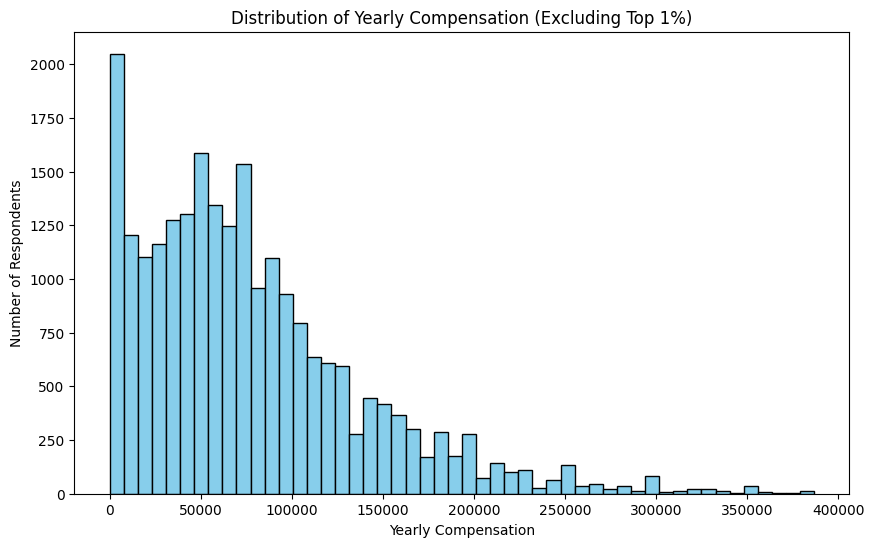

In [6]:
## Write your code here
# Pulling Data
query='''
SELECT ConvertedCompYearly
FROM main
WHERE ConvertedCompYearly IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
df_filtered = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.99)]

# Plotting Data
plt.figure(figsize=(10,6))
plt.hist(df_filtered, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Yearly Compensation (Excluding Top 1%)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Number of Respondents')
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



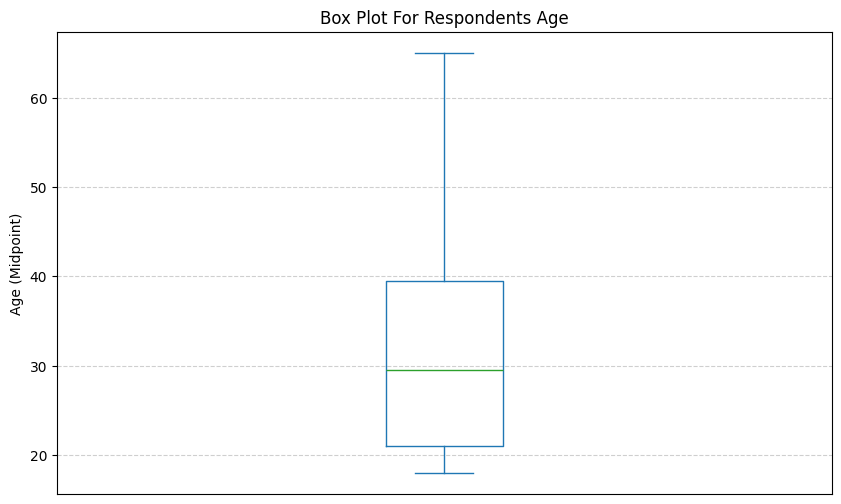

In [7]:
## Write your code here
# Pulling Data
query='''
SELECT Age 
FROM main
WHERE Age IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
df['Age'] = df['Age'].map(mapping_age_int)
df.dropna

# Plotting Data
df['Age'].plot(kind='box', figsize=(10,6))
plt.title('Box Plot For Respondents Age')
plt.xticks([])
plt.ylabel('Age (Midpoint)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xlabel('')
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



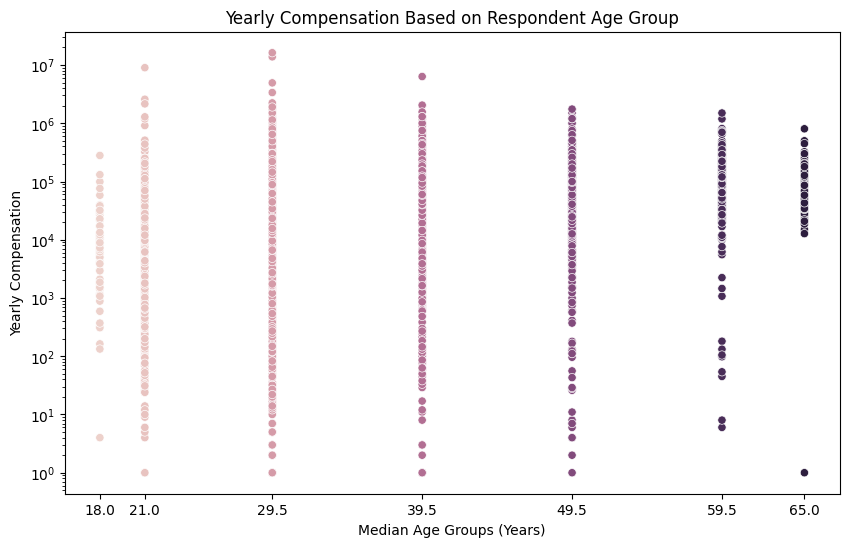

In [8]:
## Write your code here
# Pulling data
query = '''
SELECT Age, ConvertedCompYearly
FROM main
WHERE Age IS NOT NULL
AND ConvertedCompYearly IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning data
df['Age'] = df.loc[:,'Age'].map(mapping_age_int)
df.dropna(subset=['Age'], inplace=True)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df_filtered = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.99)]

# Plotting
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='ConvertedCompYearly', hue='Age', legend=None)
plt.title('Yearly Compensation Based on Respondent Age Group')
plt.yscale('log')
plt.xlabel('Median Age Groups (Years)')
plt.ylabel('Yearly Compensation')
xticks = sorted(df_filtered['Age'].unique())
plt.xticks(ticks=xticks, labels=xticks)
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


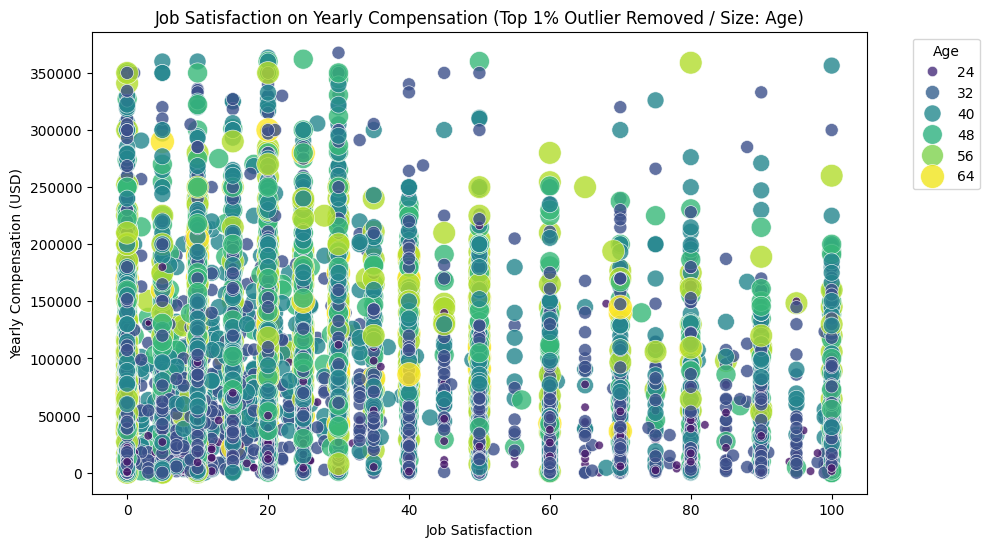

In [9]:
## Write your code here
# Pulling Data
query = '''
SELECT Age, ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE Age IS NOT NULL
AND ConvertedCompYearly IS NOT NULL
AND JobSatPoints_6 IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
df = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.99)]
df['Age'] = df.loc[:, 'Age'].map(mapping_age_int)
df.dropna(subset=['Age'], inplace=True)
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Plotting Data
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='JobSatPoints_6', y='ConvertedCompYearly', size='Age',
                sizes=(20, 300), hue='Age', palette='viridis', alpha=0.8)
plt.title('Job Satisfaction on Yearly Compensation (Top 1% Outlier Removed / Size: Age)')
plt.xlabel('Job Satisfaction')
plt.ylabel('Yearly Compensation (USD)')
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



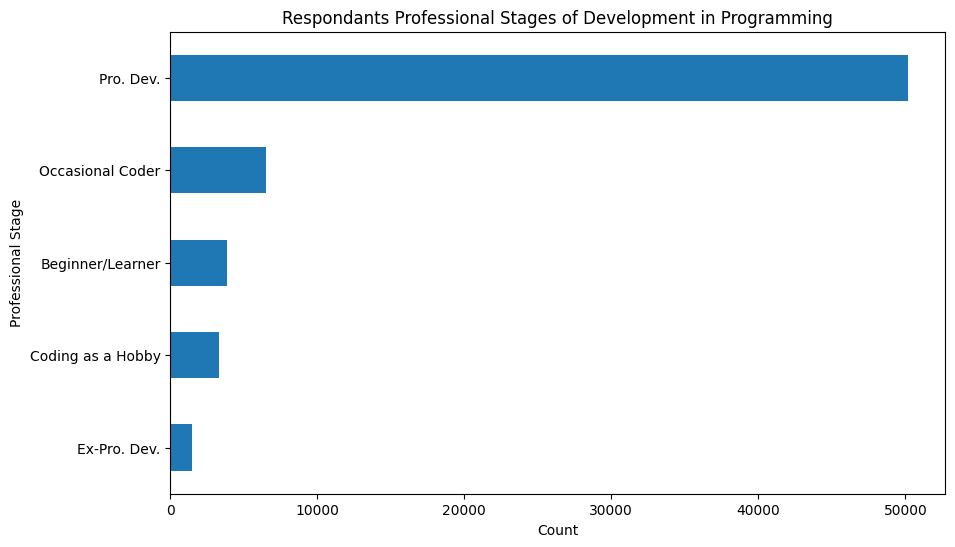

In [10]:
## Write your code here
# Pulling Data
query= '''
SELECT MainBranch
FROM main
WHERE MainBranch IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
renamed_df = df['MainBranch'].map(mapping_mainbranch).value_counts()

# Plotting Data
renamed_df.sort_values(ascending=True).plot(kind='barh', figsize=(10,6))
plt.title('Respondants Professional Stages of Development in Programming')
plt.xlabel('Count')
plt.ylabel('Professional Stage')
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



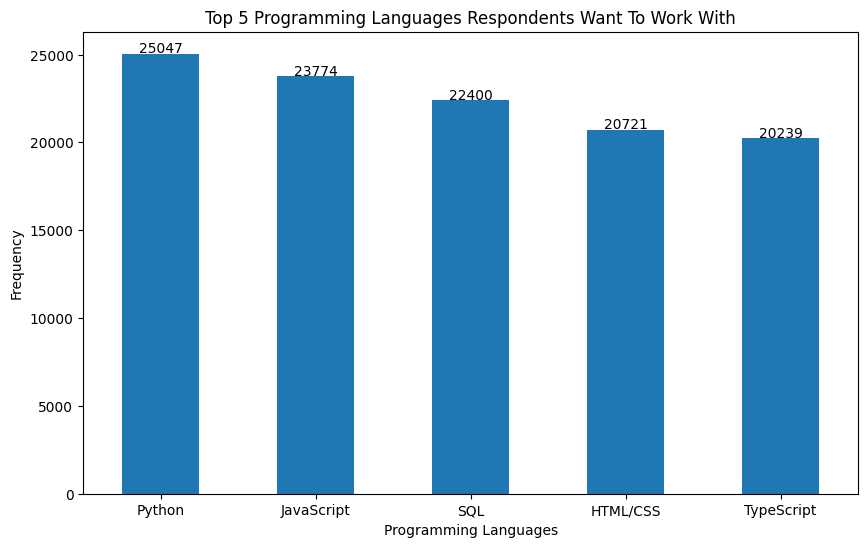

In [11]:
## Write your code here
# Pulling Data
query='''
SELECT LanguageWantToWorkWith
FROM main
WHERE LanguageWantToWorkWith IS NOT NULL
'''
df= pd.read_sql_query(query, conn)

# Cleaning Data
df['LangList'] = df['LanguageWantToWorkWith'].str.split(';')
df_exploded = df.explode('LangList')
df_exploded['LangList'] = df_exploded['LangList'].str.strip()
df_filtered = df_exploded['LangList'].value_counts().head(5)


#Plotting Data
df_filtered.plot(kind='bar',
             figsize=(10,6)
            )
plt.title('Top 5 Programming Languages Respondents Want To Work With')
plt.xlabel('Programming Languages')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
for i, v in enumerate(df_filtered):
    plt.text(i, v + 50, str(v), ha='center')
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


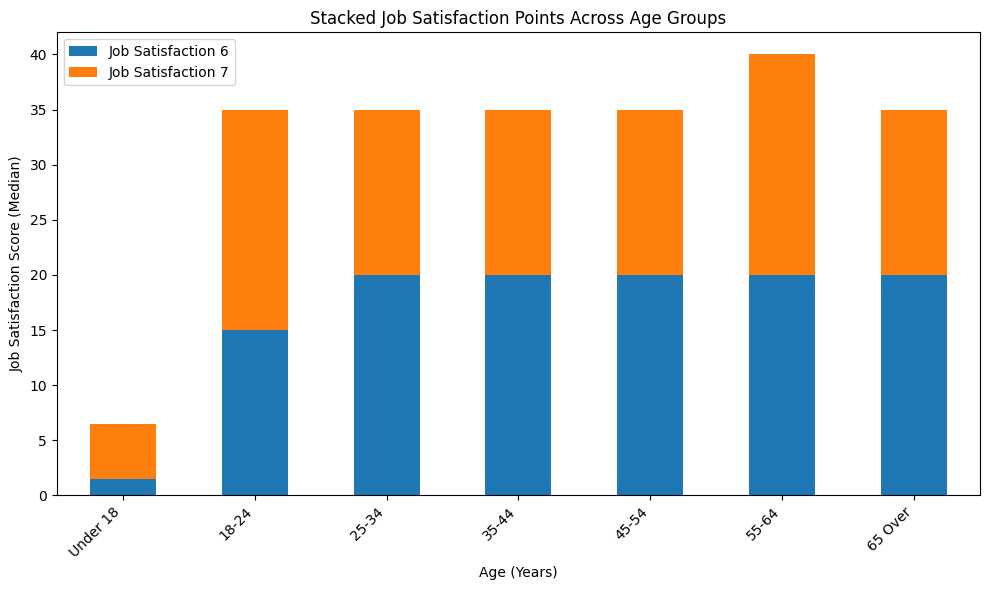

In [12]:
## Write your code here
query ='''
SELECT Age, JobSatPoints_6, JobSatPoints_7
FROM main
WHERE Age IS NOT NULL
AND JobSatPoints_6 IS NOT NULL
AND JobSatPoints_7 IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
df['Age'] = df['Age'].map(mapping_age_text)
age_groups = ['Under 18', '18-24', '25-34', '35-44', '45-54',
              '55-64', '65 Over']
df['Age'] = pd.Categorical(df['Age'], categories=age_groups, ordered=True)
df_group = df.groupby('Age', observed=False)[['JobSatPoints_6', 'JobSatPoints_7']].median()
df_group = df_group.rename(columns={'JobSatPoints_6': 'Job Satisfaction 6', 'JobSatPoints_7': 'Job Satisfaction 7'})

# Plotting Data
df_group.plot(kind='bar',
              stacked=True,
              figsize=(10,6)
             )
plt.title('Stacked Job Satisfaction Points Across Age Groups')
plt.xlabel('Age (Years)')
plt.ylabel('Job Satisfaction Score (Median)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



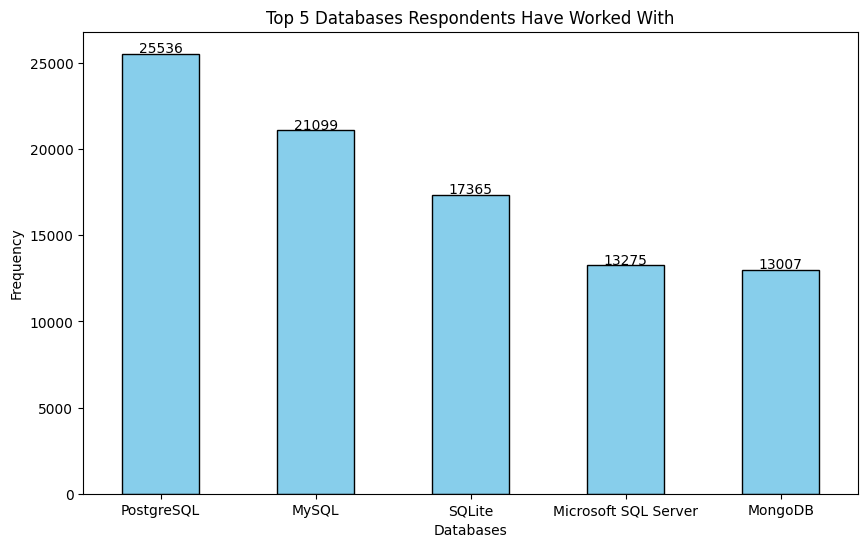

In [13]:
## Write your code here
# Pulling Data
query='''
SELECT DatabaseHaveWorkedWith
FROM main
WHERE DatabaseHaveWorkedWith IS NOT NULL
'''
df= pd.read_sql_query(query, conn)

# Cleaning Data
df['DBList'] = df['DatabaseHaveWorkedWith'].str.split(';')
df_exploded = df.explode('DBList')
df_exploded['DBList'] = df_exploded['DBList'].str.strip()
df_filtered = df_exploded['DBList'].value_counts().head(5)


#Plotting Data
df_filtered.plot(kind='bar',
                 figsize=(10,6),
                 color='skyblue',
                 edgecolor='black'
            )
plt.title('Top 5 Databases Respondents Have Worked With')
plt.xlabel('Databases')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
for i, v in enumerate(df_filtered):
    plt.text(i, v + 50, str(v), ha='center')
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



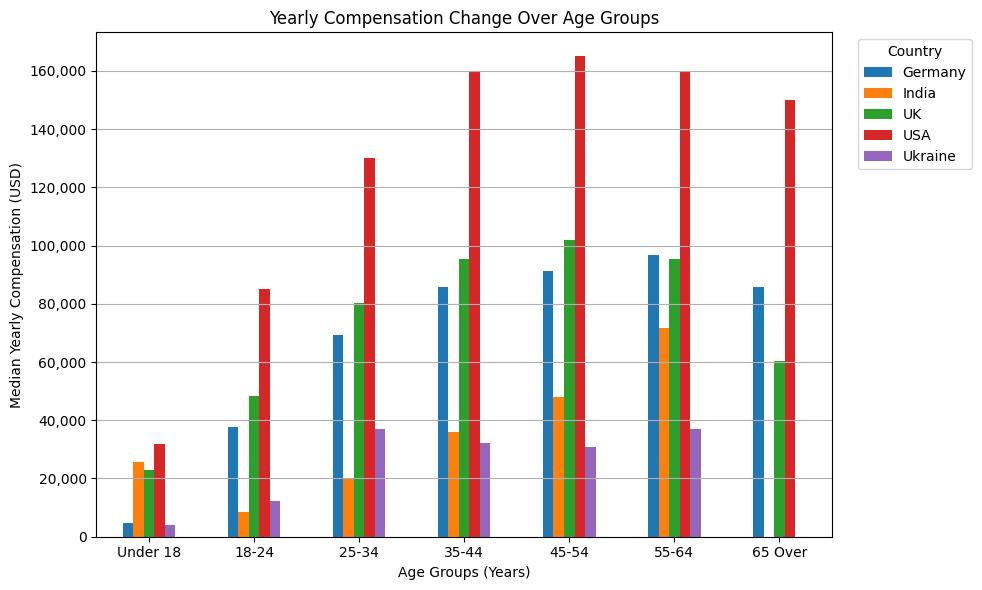

In [14]:
## Write your code here
# Pulling Data
query='''
SELECT Age, ConvertedCompYearly, Country
FROM main
WHERE Age IS NOT NULL
AND ConvertedCompYearly IS NOT NULL
AND Country IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
df['Age'] = df['Age'].map(mapping_age_text)
age_groups = ['Under 18', '18-24', '25-34', '35-44', '45-54',
              '55-64', '65 Over']
df['Age'] = pd.Categorical(df['Age'], categories=age_groups, ordered=True)
df.dropna(subset=['Age'], inplace=True)
country_list = df['Country'].value_counts().head(5).index
df_filtered = df[df['Country'].isin(country_list)].copy()
df_filtered['Country'] = df_filtered.loc[:, 'Country'].replace(mapping_country)
df_group = df_filtered.groupby(['Age', 'Country'], observed=False)['ConvertedCompYearly'].median().unstack()
df_group


# # Plotting Data
df_group.plot(kind='bar',
              figsize=(10,6)
             )
plt.title('Yearly Compensation Change Over Age Groups')
plt.xlabel('Age Groups (Years)')
plt.ylabel('Median Yearly Compensation (USD)')
plt.xticks(rotation=0)
plt.legend(title='Country', bbox_to_anchor=(1.20, 1), loc='upper right')
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{x:,.0f}')
)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



In [15]:
# This cell is for renaming and function to change names
mapping_country_label = {
    'Aruba': 'ABW',
    'Afghanistan': 'AFG',
    'Angola': 'AGO',
    'Anguilla': 'AIA',
    'Åland Islands': 'ALA',
    'Albania': 'ALB',
    'Andorra': 'AND',
    'United Arab Emirates': 'ARE',
    'Argentina': 'ARG',
    'Armenia': 'ARM',
    'American Samoa': 'ASM',
    'Antarctica': 'ATA',
    'French Southern Territories': 'ATF',
    'Antigua and Barbuda': 'ATG',
    'Australia': 'AUS',
    'Austria': 'AUT',
    'Azerbaijan': 'AZE',
    'Burundi': 'BDI',
    'Belgium': 'BEL',
    'Benin': 'BEN',
    'Bonaire, Sint Eustatius and Saba': 'BES',
    'Burkina Faso': 'BFA',
    'Bangladesh': 'BGD',
    'Bulgaria': 'BGR',
    'Bahrain': 'BHR',
    'Bahamas': 'BHS',
    'Bosnia and Herzegovina': 'BIH',
    'Saint Barthélemy': 'BLM',
    'Belarus': 'BLR',
    'Belize': 'BLZ',
    'Bermuda': 'BMU',
    'Bolivia': 'BOL',
    'Bolivia, Plurinational State of': 'BOL',
    'Brazil': 'BRA',
    'Barbados': 'BRB',
    'Brunei Darussalam': 'BRN',
    'Bhutan': 'BTN',
    'Bouvet Island': 'BVT',
    'Botswana': 'BWA',
    'Central African Republic': 'CAF',
    'Canada': 'CAN',
    'Cocos (Keeling) Islands': 'CCK',
    'Switzerland': 'CHE',
    'Chile': 'CHL',
    'China': 'CHN',
    "Côte d'Ivoire": 'CIV',
    "Côte D'Ivoire": 'CIV',
    'Cameroon': 'CMR',
    'Congo, Democratic Republic of the': 'COD',
    'Democratic Republic of the Congo': 'COD',
    'Congo, Republic of the...': 'COG',
    'Congo': 'COG',
    'Cook Islands': 'COK',
    'Colombia': 'COL',
    'Comoros': 'COM',
    'Cabo Verde': 'CPV',
    'Cape Verde': 'CPV',
    'Costa Rica': 'CRI',
    'Cuba': 'CUB',
    'Curaçao': 'CUW',
    'Christmas Island': 'CXR',
    'Cayman Islands': 'CYM',
    'Cyprus': 'CYP',
    'Czechia': 'CZE',
    'Czech Republic': 'CZE',
    'Germany': 'DEU',
    'Djibouti': 'DJI',
    'Dominica': 'DMA',
    'Denmark': 'DNK',
    'Dominican Republic': 'DOM',
    'Algeria': 'DZA',
    'Ecuador': 'ECU',
    'Egypt': 'EGY',
    'Eritrea': 'ERI',
    'Western Sahara': 'ESH',
    'Spain': 'ESP',
    'Estonia': 'EST',
    'Ethiopia': 'ETH',
    'Finland': 'FIN',
    'Fiji': 'FJI',
    'Falkland Islands (Malvinas)': 'FLK',
    'France': 'FRA',
    'Faroe Islands': 'FRO',
    'Micronesia, Federated States of...': 'FSM',
    'Gabon': 'GAB',
    'United Kingdom of Great Britain and Northern Ireland': 'GBR',
    'Georgia': 'GEO',
    'Guernsey': 'GGY',
    'Ghana': 'GHA',
    'Gibraltar': 'GIB',
    'Guinea': 'GIN',
    'Guadeloupe': 'GLP',
    'Gambia': 'GMB',
    'Guinea-Bissau': 'GNB',
    'Equatorial Guinea': 'GNQ',
    'Greece': 'GRC',
    'Grenada': 'GRD',
    'Greenland': 'GRL',
    'Guatemala': 'GTM',
    'French Guiana': 'GUF',
    'Guam': 'GUM',
    'Guyana': 'GUY',
    'Hong Kong': 'HKG',
    'Hong Kong (S.A.R.)':'HKG',
    'Heard Island and McDonald Islands': 'HMD',
    'Honduras': 'HND',
    'Croatia': 'HRV',
    'Haiti': 'HTI',
    'Hungary': 'HUN',
    'Indonesia': 'IDN',
    'Isle of Man': 'IMN',
    'India': 'IND',
    'British Indian Ocean Territory': 'IOT',
    'Ireland': 'IRL',
    'Iran, Islamic Republic of...': 'IRN',
    'Iraq': 'IRQ',
    'Iceland': 'ISL',
    'Israel': 'ISR',
    'Italy': 'ITA',
    'Jamaica': 'JAM',
    'Jersey': 'JEY',
    'Jordan': 'JOR',
    'Japan': 'JPN',
    'Kazakhstan': 'KAZ',
    'Kenya': 'KEN',
    'Kyrgyzstan': 'KGZ',
    'Cambodia': 'KHM',
    'Kiribati': 'KIR',
    'Saint Kitts and Nevis': 'KNA',
    'Korea, Republic of': 'KOR',
    'Republic of Korea': 'KOR',
    'South Korea': 'KOR',
    'Kuwait': 'KWT',
    "Lao People's Democratic Republic": 'LAO',
    'Lebanon': 'LBN',
    'Liberia': 'LBR',
    'Libya': 'LBY',
    'Libyan Arab Jamahiriya': 'LBY',
    'Saint Lucia': 'LCA',
    'Liechtenstein': 'LIE',
    'Sri Lanka': 'LKA',
    'Lesotho': 'LSO',
    'Lithuania': 'LTU',
    'Luxembourg': 'LUX',
    'Latvia': 'LVA',
    'Macao': 'MAC',
    'Saint Martin (French part)': 'MAF',
    'Morocco': 'MAR',
    'Monaco': 'MCO',
    'Moldova, Republic of': 'MDA',
    'Republic of Moldova': 'MDA',
    'Madagascar': 'MDG',
    'Maldives': 'MDV',
    'Mexico': 'MEX',
    'Marshall Islands': 'MHL',
    'North Macedonia': 'MKD',
    'Republic of North Macedonia': 'MKD',
    'Mali': 'MLI',
    'Malta': 'MLT',
    'Myanmar': 'MMR',
    'Montenegro': 'MNE',
    'Mongolia': 'MNG',
    'Northern Mariana Islands': 'MNP',
    'Mozambique': 'MOZ',
    'Mauritania': 'MRT',
    'Montserrat': 'MSR',
    'Martinique': 'MTQ',
    'Mauritius': 'MUS',
    'Malawi': 'MWI',
    'Malaysia': 'MYS',
    'Mayotte': 'MYT',
    'Namibia': 'NAM',
    'New Caledonia': 'NCL',
    'Niger': 'NER',
    'Norfolk Island': 'NFK',
    'Nigeria': 'NGA',
    'Nicaragua': 'NIC',
    'Niue': 'NIU',
    'Netherlands, Kingdom of the': 'NLD',
    'Netherlands': 'NLD', 
    'Norway': 'NOR',
    'Nepal': 'NPL',
    'Nauru': 'NRU',
    'New Zealand': 'NZL',
    'Oman': 'OMN',
    'Pakistan': 'PAK',
    'Panama': 'PAN',
    'Pitcairn': 'PCN',
    'Peru': 'PER',
    'Philippines': 'PHL',
    'Palau': 'PLW',
    'Papua New Guinea': 'PNG',
    'Poland': 'POL',
    'Puerto Rico': 'PRI',
    "Korea, Democratic People's Republic of": 'PRK',
    'North Korea':'PRK',
    "Democratic People's Republic of Korea": 'PRK',
    'Kosovo': 'XKX',
    ' Kosovo': 'XKX',
    'Kosovo ': 'XKX',
    'Portugal': 'PRT',
    'Paraguay': 'PRY',
    'Palestine, State of': 'PSE',
    'Palestine': 'PSE',
    'French Polynesia': 'PYF',
    'Qatar': 'QAT',
    'Réunion': 'REU',
    'Romania': 'ROU',
    'Russian Federation': 'RUS',
    'Rwanda': 'RWA',
    'Saudi Arabia': 'SAU',
    'Sudan': 'SDN',
    'Senegal': 'SEN',
    'Singapore': 'SGP',
    'South Georgia and the South Sandwich Islands': 'SGS',
    'Saint Helena, Ascension and Tristan da Cunha': 'SHN',
    'Svalbard and Jan Mayen': 'SJM',
    'Solomon Islands': 'SLB',
    'Sierra Leone': 'SLE',
    'El Salvador': 'SLV',
    'San Marino': 'SMR',
    'Somalia': 'SOM',
    'Saint Pierre and Miquelon': 'SPM',
    'Serbia': 'SRB',
    'South Sudan': 'SSD',
    'Sao Tome and Principe': 'STP',
    'Suriname': 'SUR',
    'Slovakia': 'SVK',
    'Slovenia': 'SVN',
    'Sweden': 'SWE',
    'Eswatini': 'SWZ',
    'Swaziland': 'SWZ',
    'Sint Maarten (Dutch part)': 'SXM',
    'Seychelles': 'SYC',
    'Syrian Arab Republic': 'SYR',
    'Turks and Caicos Islands': 'TCA',
    'Chad': 'TCD',
    'Togo': 'TGO',
    'Thailand': 'THA',
    'Tajikistan': 'TJK',
    'Tokelau': 'TKL',
    'Turkmenistan': 'TKM',
    'Timor-Leste': 'TLS',
    'Tonga': 'TON',
    'Trinidad and Tobago': 'TTO',
    'Tunisia': 'TUN',
    'Türkiye': 'TUR',
    'Turkey': 'TUR',
    'Tuvalu': 'TUV',
    'Taiwan, Province of China': 'TWN',
    'Taiwan': 'TWN',
    'Tanzania, United Republic of': 'TZA',
    'United Republic of Tanzania': 'TZA',
    'Uganda': 'UGA',
    'Ukraine': 'UKR',
    'United States Minor Outlying Islands': 'UMI',
    'Uruguay': 'URY',
    'United States of America': 'USA',
    'Uzbekistan': 'UZB',
    'Holy See': 'VAT',
    'Saint Vincent and the Grenadines': 'VCT',
    'Venezuela, Bolivarian Republic of...': 'VEN',
    'Virgin Islands (British)': 'VGB',
    'Virgin Islands (U.S.)': 'VIR',
    'Viet Nam': 'VNM',
    'Vanuatu': 'VUT',
    'Wallis and Futuna': 'WLF',
    'Samoa': 'WSM',
    'Yemen': 'YEM',
    'South Africa': 'ZAF',
    'Zambia': 'ZMB',
    'Zimbabwe': 'ZWE',
}

def alpha3_to_continent(alpha3):
    try:
        alpha2 = pc.country_alpha3_to_country_alpha2(alpha3)
        cont_code = pc.country_alpha2_to_continent_code(alpha2)
        return pc.convert_continent_code_to_continent_name(cont_code)
    except:
        return 'Unknown'

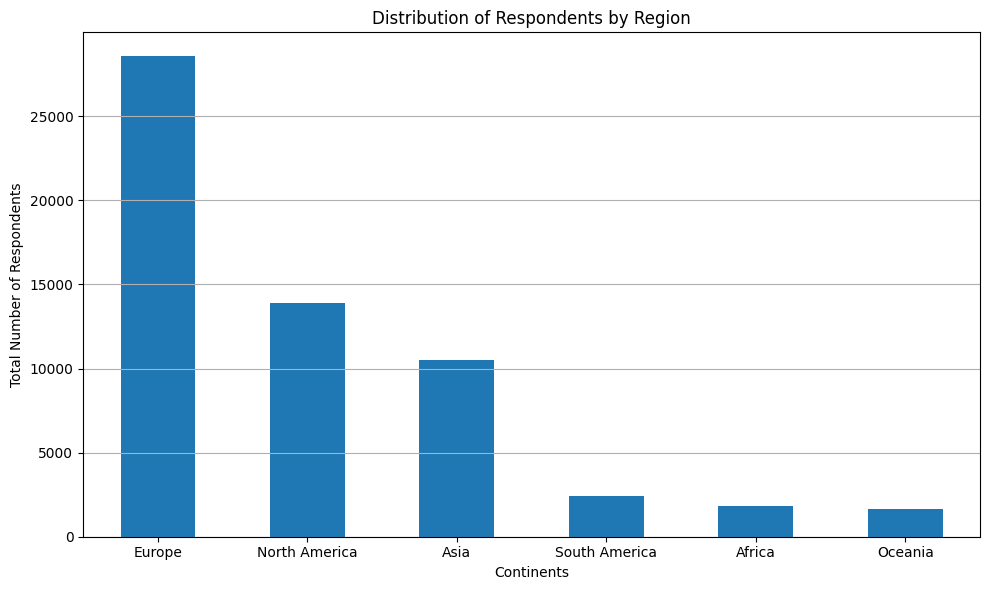

In [16]:
## Write your code here
# Pulling Data
query = '''
SELECT Country
FROM main
WHERE Country IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
df['Country_ISO3'] = df['Country'].map(mapping_country_label)
df['Continent'] = df['Country_ISO3'].apply(alpha3_to_continent)
region_counts = df.groupby('Continent').size().reset_index(name='Count')
region_counts = region_counts[region_counts['Continent'] != 'Unknown']
# Count respondents per continent
continent_df = (
    df[df['Continent'] != 'Unknown']
    .groupby('Continent')
    .size()
    .reset_index(name='Count')
    .sort_values('Count', ascending=False)
)


# Plot Data
continent_df.plot(kind='bar',
                  x='Continent',
                  y='Count',
                  figsize=(10,6),
                  legend=None
                 )
plt.title('Distribution of Respondents by Region')
plt.xlabel('Continents')
plt.ylabel('Total Number of Respondents')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

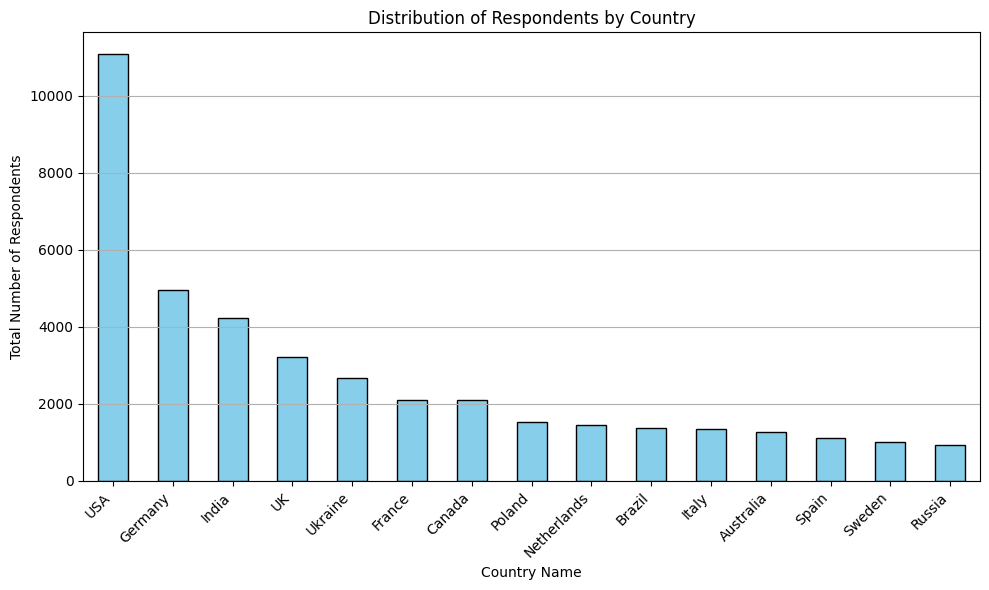

In [17]:
## Write your code here
# Pulling Data
query = '''
SELECT Country
FROM main
WHERE Country IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
top15_country = df['Country'].value_counts().head(15).index
df_filtered = df[df['Country'].isin(top15_country)].copy()
df_filtered['Country'] = df_filtered.loc[:, 'Country'].replace(mapping_country)
df_groupby = df_filtered.groupby('Country').size().reset_index(name='Count')
df_groupby

# Plotting Data
df_groupby.sort_values('Count', ascending=False).plot(kind='bar',
                                                      x='Country',
                                                      figsize=(10,6),
                                                      color='skyblue',
                                                      edgecolor='black',
                                                      legend=None
                                                     )
plt.title('Distribution of Respondents by Country')
plt.xlabel('Country Name')
plt.ylabel('Total Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [18]:
# Final step is closing the DB connection
conn.close()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
